### Jacob Moxley
#### Group 1
#### Question 2
We know that for first order constant volume batch reactors that half life for the reactants is independent of time thus the second half life is also 5 minutes so 10 minutes total to get to 75% conversion
#### Question 3
As we derived in class for an nth order reaction:
$$(\frac{C_A}{C_{A0}})^{1-n}-1 = (n-1)C_{A0}^{n-1} kt$$
When we plug in n = 2 and solve for $C_A$
$$\frac{1}{C_{A}} = \frac{1}{C_{A0}}+kt$$
Now we take a basis of 1 mole for $C_{A0}$ and find:
$$\frac{1}{0.5} \frac{1}{M} = 1 \frac{1}{M} + k \cdot 300 \frac{1}{Ms} \rightarrow k = \frac{1}{300} \frac{1}{Ms}$$
Then we solve for the time it takes to get to 75% conversion:
$$\frac{1}{0.25} \frac{1}{M} = 1+\frac{1}{300} \frac{1}{Ms} \cdot t \rightarrow t = 900s = 15min$$
#### Question 8
We begin by converting the pressure data we have to concentration by using the ideal gas law and taking into account the partial pressure of hydrogen:
$$C_H0 = \frac{0.5P}{RT}$$
Now we can use the solution that we found for a general fixed volume reactor with an nth order reaction:
$$(\frac{C_a}{C_{a0}}^{1-n}-1 = (n-1)C_{a0}^{n-1}kt = (1-X_a)^{1-n}-1$$
Which we then linearize as:
$$ln(t_{1/2}) = (1-n) ln(\frac{1-(C_{a0} - C_{a})/C_{a0}}{k}) - ln(\frac{1}{k})$$
Now we can plot $ln(t_{1/2})$ vs. $ln(C_{a0})$ and fit a least squares line

In [159]:
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
p = np.array([200, 240, 280, 320, 360])
p = p/760
ca = p*0.5/(0.08206*298)
ca = np.log(ca)
tHalf = np.array([265, 186, 115, 104, 67])
tHalf = np.log(tHalf)
ca = sm.add_constant(ca)
model = sm.OLS(tHalf, ca)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     126.8
Date:                Tue, 02 Feb 2021   Prob (F-statistic):            0.00150
Time:                        22:28:01   Log-Likelihood:                 6.0215
No. Observations:                   5   AIC:                            -8.043
Df Residuals:                       3   BIC:                            -8.824
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.2700      0.991     -6.326      0.0

C:\Users\Jacob\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


As we can see we have a close to linear relationship with 97.7% of the variance explained by the model. We can take a look at the x1 coefficent and see that $1-n = -2.271 \rightarrow n = 3.271$ so we have a 3.271 order reaction

#### Question 13
This is an example of 2 parallel first order reactions which we desribed in class. We should begin be solving for the reaction constants for each reaction (game). First:
$$C = C_0 \cdot exp[-k_1t] \rightarrow 1 = 0.5 \cdot exp[-k_1 \cdot 4] \rightarrow k_1 = \frac{ln(2)}{4}$$
Second:
$$C = C_0 \cdot exp[-k_2t] \rightarrow 1 = 0.5 \cdot exp[-k_2 \cdot 2] \rightarrow k_2 = \frac{ln(2)}{2}$$
Now we can take a look at the overall rate expression which we know from deriving in class is:
$$C = C_0 \cdot exp[-(k_1+k_2t)] \rightarrow 10 = 1000 \cdot exp[-(\frac{ln(2)}{4} + \frac{ln(2)}{2})t] \rightarrow t = 8.87 \; hours$$
#### Question 15
We begin by looking at our rate law and then setting it equal to the derivative of $C_a$ with respect to time:
$$r_a = \frac{k_3C_aC_{eo}}{C_a+C_m} = \frac{\partial C_a}{\partial t}$$
Now we can seperate and integrate:
$$-k C_{eo} \partial t = \partial C_a \frac{(C_a + C_m)}{C_a}$$
$$-kC_{eo} \int_{0}^{t} \partial t = \int_{C_{a0}}^{C_a} \partial C_a + C_m \int_{C_{a0}}^{C_a} \frac{\partial C_a}{C_a}$$
$$-kC_{eo}t = (C_a-C_{a0})+C_m ln(\frac{C_a}{C_{a0}})$$
Now after a bit of rearranging we can get this into a y = mx+b form:
$$-kC_{eo}t = (C_a-C_{a0})+C_m ln(\frac{C_a}{C_{a0}}) \rightarrow \frac{ln(C_a/C_{a0})}{C_{a0}-C_{a}} = -\frac{k_3C_{eo}}{C_m} \frac{t}{C_{a0}-C_{a}} + \frac{1}{C_m}$$

In [171]:
Ca = np.array([0.84,0.68,0.53,0.38,0.27,0.16,0.09,0.04,0.018,0.006,0.0025])
ca0 = 1
y = np.log(Ca)/(ca0-Ca)
t = np.arange(1,12)
x = t/(ca0-Ca)
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4592.
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           1.68e-13
Time:                        23:33:56   Log-Likelihood:                 13.503
No. Observations:                  11   AIC:                            -23.01
Df Residuals:                       9   BIC:                            -22.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0960      0.118     43.042      0.0

C:\Users\Jacob\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Now we can see that our $b = \frac{1}{C_m} = 5.0960 \rightarrow C_m = 0.196 mM$ and then we can plug that into $\frac{k_3C_{eo}}{C_m} \rightarrow k_3 = 19.8 \; hr^{-1}$

#### Group II
#### question 2
We can state this problem in the term suggested so that the absorption of coke into blood is a 0th order reaction and the decomposition of caffine is a first order reaction. This means we end up with 2 different rates which are:
$$R_c = 50-k_1C_c \; while \; drinking$$
$$R_c = -k_1C_c \; after \; stoping$$
This means we can find $k_1$ becuase we know the half life and for a first order reaction the half life and reaction constant are directly related.
$$\frac{\partial C_c}{\partial t} = -k_1 \partial t \rightarrow k_1 = \frac{-ln(1/2)}{4}$$
Now we are going to use RK4 to estimate the concentration of caffine while drinking and then check each data point to see if Prof. Bowmann stopped drinking now would he be able to get to sleep by seeing if the caffine concentration will decay to less than 100mg by 10pm. We begin by looking at the steady state concentration where the derivative is equal to 0 so we can assess the stability of our RK4 step size and make sure we are not overshooting.

In [56]:
print('SS concentration is:', -200/np.log(1/2), 'mg')

SS concentration is: 288.5390081777927 mg


In [57]:
def rk4(h, Cc0):
    rxnK = np.log(1/2)/4
    k1 = h*(50+rxnK*Cc0)
    k2 = h*(50+rxnK*(Cc0+k1/2))
    k3 = h*(50+rxnK*(Cc0+k2/2))
    k4 = h*(50+rxnK*(Cc0+k3))
    return(Cc0 + k1/6 + k2/3 + k3/3 + k4/6)

In [73]:
initC = 0 
data = np.empty((0,2))
t = np.linspace(0,15,151) #we will generate data as if he drinks all the way up to 10pm
for i in t:
    data = np.append(data, np.array([[i, initC]]), axis = 0)
    initC = rk4(0.1, initC) #using a step size of 0.1 which is how our linspaced t looks

In [76]:
data[-1:]

array([[ 15.        , 267.09321804]])

As we can see our concentration at 15 hours is not above our steady state concentration so we have stability. Now we can check each data point with our rate law for the concentration of caffine once consumption has stopped.

In [79]:
for i in range(data.shape[0]):
    if(100 < data[i][1]*np.exp(np.log(1/2)/4 * (15-data[i][0]))):
        print('You need to stop drinking coke at', 7+data[i-1][0], 'hours')
        break

You need to stop drinking coke at 17.0 hours


And we can now see that Dr. Bowmann should stop drinking coke at 5pm sharp

#### Question 3
We begin with the balanced equation for the combustion of ethane in pure oxygen:
$$2C_2H_6(g)+7O_2 \rightarrow 4CO_2 + 6H_2O(g)$$
We can see that we have 9 moles of gas on the left side of our equations and 10 moles on the right side so epsilon is:
$$\epsilon = \frac{N_f-N_i}{N_i} = \frac{10-9}{9}= \frac{1}{9}$$
Now when we add in inert we see that:
$$2C_2H_6(g)+7O_2 + \frac{1}{0.21}I \rightarrow 4CO_2 + 6H_2O(g) + \frac{1}{0.21}I$$
which means that epsilon becomes:
$$\epsilon = \frac{1}{9+\frac{1}{0.21}} = \frac{1}{13.76}$$
As we discussed in class adding inert forces epsilon to tend to 0 which makes sense because the reaction is generating or consuming a lower percentage of the total moles in the system.

#### Question 4
In class we derived the time to reach a given conversion for an nth order reaction which works out to:
$$t = \frac{1}{kC^{n-1}_{A0}} \cdot \int_{0}^{X_A} \frac{(1+\epsilon X_A)^{n-1}}{(1-X_A)^n} \partial X_A$$
The problem gives us k and $X_A$. We also note that k is the same value in L/mol s. We now assume the ideal gas law and find that concentration is:
$$\frac{n}{V} = \frac{P}{RT} = \frac{1 atm}{0.08205 Latm/(molK) (530+273)K} = 0.0152 \frac{mol}{L}$$
Now we need to find epsilon. We know there are no inerts in the feed so:
$$\epsilon = \frac{2-1}{1} = 1$$
Now we can solve the integral:
$$t = \frac{1}{0.27 \frac{L}{mols} 0.0152 \frac{mol}{L}} \cdot \int_{0}^{0.9} \frac{(1+ 0.9)^{1}}{(1-0.9)^2} \partial X_A = 41,667s = 11.56hr$$

#### Question 5
This is a set of coupled ODE's which we will now present and then use a numeric solver to step through. Our rates are:
$$\frac{\partial C_a}{\partial t} = -k_1C_aC_r-k_2C_a$$
$$\frac{\partial C_r}{\partial t} = k_1C_aC_r$$
$$\frac{\partial C_s}{\partial t} = k_2C_a$$
now we can see that what we need to do is take one step forward in time and solve for $C_a, C_r, C_s$ and continue this process until $C_a < 0.01C_{a0}$

In [88]:
def stepCa(h, Ca0, Cr0):
    k1 = h*(-Ca0*Cr0-Ca0)
    k2 = h*(-(Ca0+k1/2)*Cr0 - (Ca0+k1/2))
    k3 = h*(-(Ca0+k2/2)*Cr0 - (Ca0+k2/2))
    k4 = h*(-(Ca0+k3)*Cr0 - (Ca0+k3))
    return(Ca0 + k1/6 + k2/3 + k3/3 + k4/6)

In [89]:
def stepCr(h, Ca0, Cr0):
    k1 = h*(Ca0*Cr0)
    k2 = h*(Ca0*(Cr0+k1/2))
    k3 = h*(Ca0*(Cr0+k2/2))
    k4 = h*(Ca0*(Cr0+k3))
    return(Cr0 + k1/6 + k2/3 + k3/3 + k4/6)

In [94]:
def stepCs(h, Ca0, Cs0):
    k1 = h*Ca0
    k2 = h*(Ca0+k1/2)
    k3 = h*(Ca0+k2/2)
    k4 = h*(Ca0+k3)
    return(Cs0 + k1/6 + k2/3 + k3/3 + k4/6)

In [129]:
def datagen(data, cutoff, h):
    nex = np.array([[1,cutoff+1,1,1]])
    i = 0
    while(nex[0][1] > cutoff):
        nex = np.array([[(i+1)*h, stepCa(h, data[i][1], data[i][2]), stepCr(h, data[i][1], data[i][2]),\
                         stepCs(h, data[i][1], data[i][3])]])
        data = np.append(data, nex, axis = 0)
        i += 1
        
    return(data)

In [132]:
data1 = datagen(np.array([[0, 4, 0, 0]]), 0.04, 0.001) #Case one where at t = 0 Ca = 4, Cr = 0, Cs = 0
data2 = datagen(np.array([[0, 4, 0.2, 0]]), 0.04, 0.001)
data3 = datagen(np.array([[0, 4, 1, 0]]), 0.04, 0.001)
data4 = datagen(np.array([[0, 4, 5, 0]]), 0.04, 0.001)

In [151]:
import matplotlib.patches as mpatches

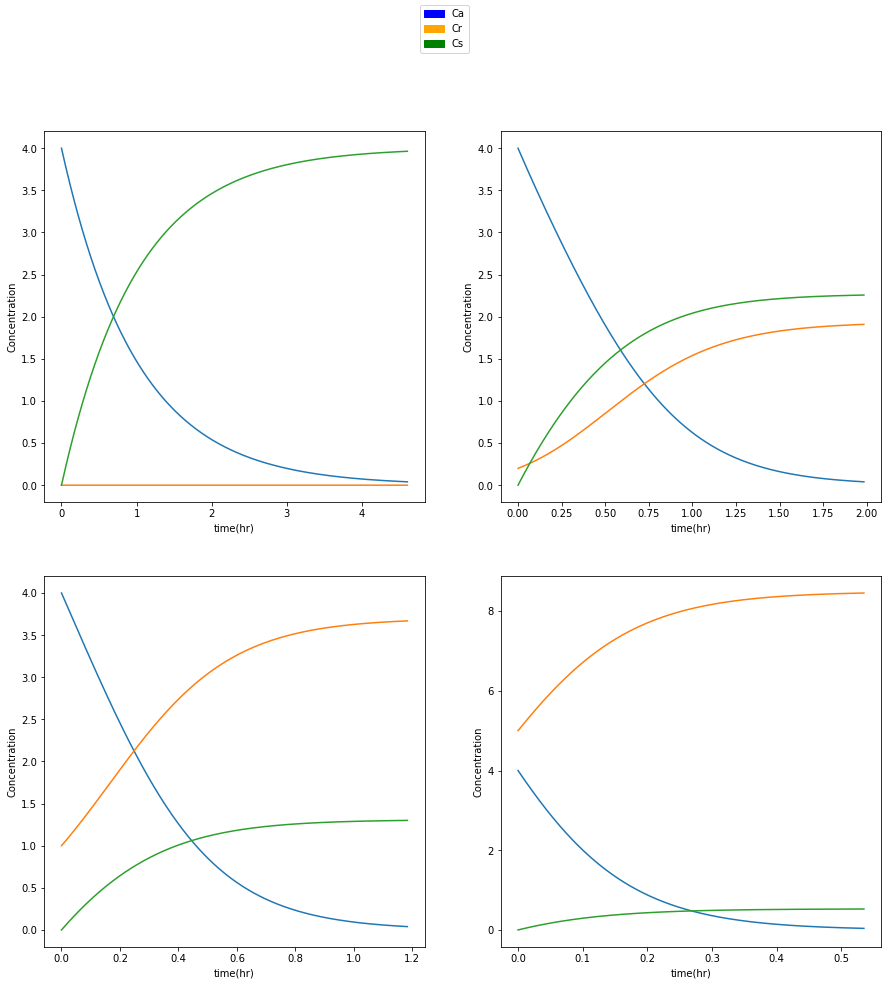

In [156]:
fig, axs = plt.subplots(2,2, figsize = (15,15))
for i in range(1,4):
    axs[0,0].plot(data1[:,0], data1[:,i])
    axs[0,1].plot(data2[:,0], data2[:,i])
    axs[1,0].plot(data3[:,0], data3[:,i])
    axs[1,1].plot(data4[:,0], data4[:,i])
    

blue_patch = mpatches.Patch(color='blue', label='Ca')
orange_patch = mpatches.Patch(color = 'orange', label = 'Cr')
green_patch = mpatches.Patch(color = 'green', label = 'Cs')
fig.legend(handles=[blue_patch, orange_patch, green_patch], loc = 'upper center')
for ax in axs.flat:
    ax.set(xlabel='time(hr)', ylabel='Concentration')